## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[152.   141.   145.  ]
   [146.25 135.25 139.25]
   [168.25 157.25 161.25]
   ...
   [155.25 144.25 150.25]
   [156.25 145.25 151.25]
   [157.   146.   152.  ]]

  [[157.   146.   150.  ]
   [150.   139.   143.  ]
   [156.   145.   149.  ]
   ...
   [152.   141.   147.  ]
   [148.   137.   143.  ]
   [156.5  145.5  151.5 ]]

  [[157.75 146.75 150.75]
   [159.25 148.25 152.25]
   [158.5  147.5  151.5 ]
   ...
   [150.5  139.5  145.5 ]
   [154.75 143.75 149.75]
   [156.25 145.25 151.25]]

  ...

  [[137.   125.   125.  ]
   [154.5  142.5  142.5 ]
   [144.5  132.5  132.5 ]
   ...
   [145.75 134.75 138.75]
   [153.75 142.75 146.75]
   [155.5  144.5  148.5 ]]

  [[140.5  128.5  128.5 ]
   [139.75 127.75 127.75]
   [153.5  141.5  141.5 ]
   ...
   [134.5  123.5  127.5 ]
   [150.   139.   143.  ]
   [153.5  142.5  146.5 ]]

  [[145.75 133.75 133.75]
   [149.25 137.25 137.25]
   [148.75 136.75 136.75]
   ...
   [151.75 140.75 144.75]
   [157.25 146.25 150.25]
   [150.   139.   14

### To avoid Overshooting
1.Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibility that model unable to capture relevent feature or model is confusing due to lack of feature so feed with more feature 

### Building Model

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
## Bulding Convolution Layer

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units=1500,activation='relu'))

In [18]:
model.add(Dropout(0.25)) # To avoid Overfitting 

In [19]:
#Output Layer
model.add(Dense(units=38,activation="softmax"))

### Compiling Model

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       6,913,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,682,762 (44.57 MB)

 Trainable params: 11,682,762 (44.57 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [22]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4040s 2s/step - accuracy: 0.4725 - loss: 1.8647 - val_accuracy: 0.8511 - val_loss: 0.4789
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3419s 2s/step - accuracy: 0.8554 - loss: 0.4559 - val_accuracy: 0.9154 - val_loss: 0.2658
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3115s 1s/step - accuracy: 0.9126 - loss: 0.2624 - val_accuracy: 0.9024 - val_loss: 0.3040
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3125s 1s/step - accuracy: 0.9424 - loss: 0.1789 - val_accuracy: 0.9444 - val_loss: 0.1695
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3116s 1s/step - accuracy: 0.9570 - loss: 0.1279 - val_accuracy: 0.9517 - val_loss: 0.1409
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 18714s 9s/step - accuracy: 0.9677 - loss: 0.0947 - val_accuracy: 0.9556 - val_loss: 0.1366
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3991s 2s/step - accuracy: 0.9732 - loss: 0.0831 - val_accuracy: 0.9624 - val_loss: 0.1200
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3171s 1s/step - accuracy: 0.9758 

## Model Evaluation

In [30]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 876s 398ms/step - accuracy: 0.9928 - loss: 0.0203


In [36]:
print(train_loss,train_acc)

0.018083861097693443 0.9940109252929688


In [31]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 232s 420ms/step - accuracy: 0.9694 - loss: 0.1059


In [37]:
print(val_loss,val_acc)

0.1107722818851471 0.9674482345581055


### Saving Model

In [44]:
model.save("trained_model.keras")

In [45]:
training_history.history

{'accuracy': [0.6560637354850769,
  0.8771605491638184,
  0.9217582941055298,
  0.9481471180915833,
  0.9598691463470459,
  0.9688029289245605,
  0.973668098449707,
  0.9774094820022583,
  0.9817910194396973,
  0.9827725887298584],
 'loss': [1.1564126014709473,
  0.3882578909397125,
  0.2368953675031662,
  0.1592991054058075,
  0.12067762762308121,
  0.09333280473947525,
  0.0813572034239769,
  0.06746423989534378,
  0.05664317309856415,
  0.05184005945920944],
 'val_accuracy': [0.8510698676109314,
  0.9154336452484131,
  0.9024015665054321,
  0.9444001913070679,
  0.9517413973808289,
  0.9555543065071106,
  0.9624402523040771,
  0.9495788812637329,
  0.9694969058036804,
  0.9674482345581055],
 'val_loss': [0.47893384099006653,
  0.2657969892024994,
  0.303956001996994,
  0.16951172053813934,
  0.14094054698944092,
  0.13657714426517487,
  0.11999151110649109,
  0.15982629358768463,
  0.10698838531970978,
  0.11077228933572769]}

In [46]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [41]:
training_history.history['val_accuracy']

[0.8510698676109314,
 0.9154336452484131,
 0.9024015665054321,
 0.9444001913070679,
 0.9517413973808289,
 0.9555543065071106,
 0.9624402523040771,
 0.9495788812637329,
 0.9694969058036804,
 0.9674482345581055]

### Accuracy Visualization

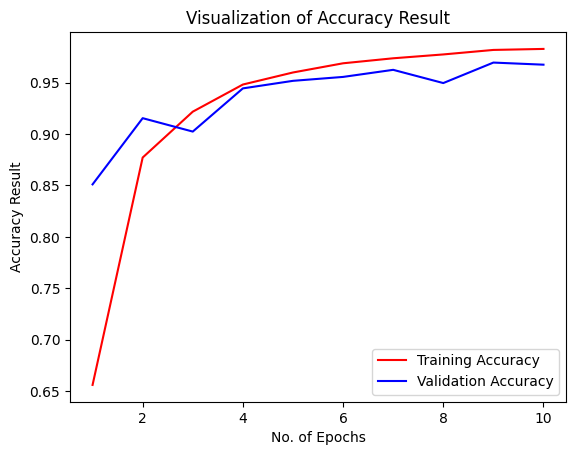

In [47]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other matrics for model evaluation

In [48]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [50]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [51]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 199s 361ms/step


(array([[9.9999928e-01, 4.0210301e-07, 5.3737993e-11, ..., 5.8815421e-16,
         1.2697583e-14, 3.7193786e-14],
        [9.9997950e-01, 1.5367615e-06, 3.7011130e-09, ..., 8.4640203e-12,
         1.0382947e-10, 1.4639708e-10],
        [9.9999988e-01, 2.9166012e-08, 6.0648975e-10, ..., 7.9921909e-14,
         5.5834753e-13, 9.1921956e-12],
        ...,
        [2.2301371e-11, 7.6533010e-15, 8.7514934e-10, ..., 3.4969101e-13,
         5.5453454e-12, 9.9999988e-01],
        [1.1036380e-10, 9.9052329e-16, 8.6346147e-10, ..., 2.2395597e-12,
         5.4936116e-12, 9.9999952e-01],
        [3.3533396e-16, 4.2000133e-18, 5.1174832e-17, ..., 7.6628606e-21,
         5.0650453e-17, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [54]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [55]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [56]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [57]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

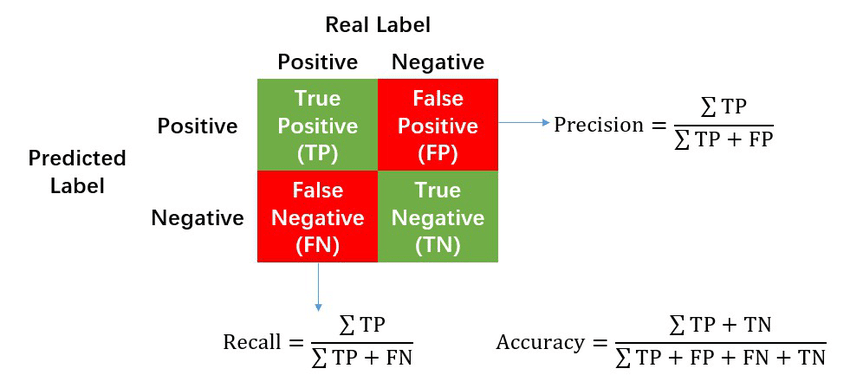!

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.98      0.95       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.96      0.97       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       0.95      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.92      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.95      0.

In [62]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[493,   3,   0, ...,   0,   0,   0],
       [  1, 491,   0, ...,   0,   0,   0],
       [  2,   0, 424, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 481,   0,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   0, ...,   0,   0, 473]], dtype=int64)

### Confusion Matrix Visualization

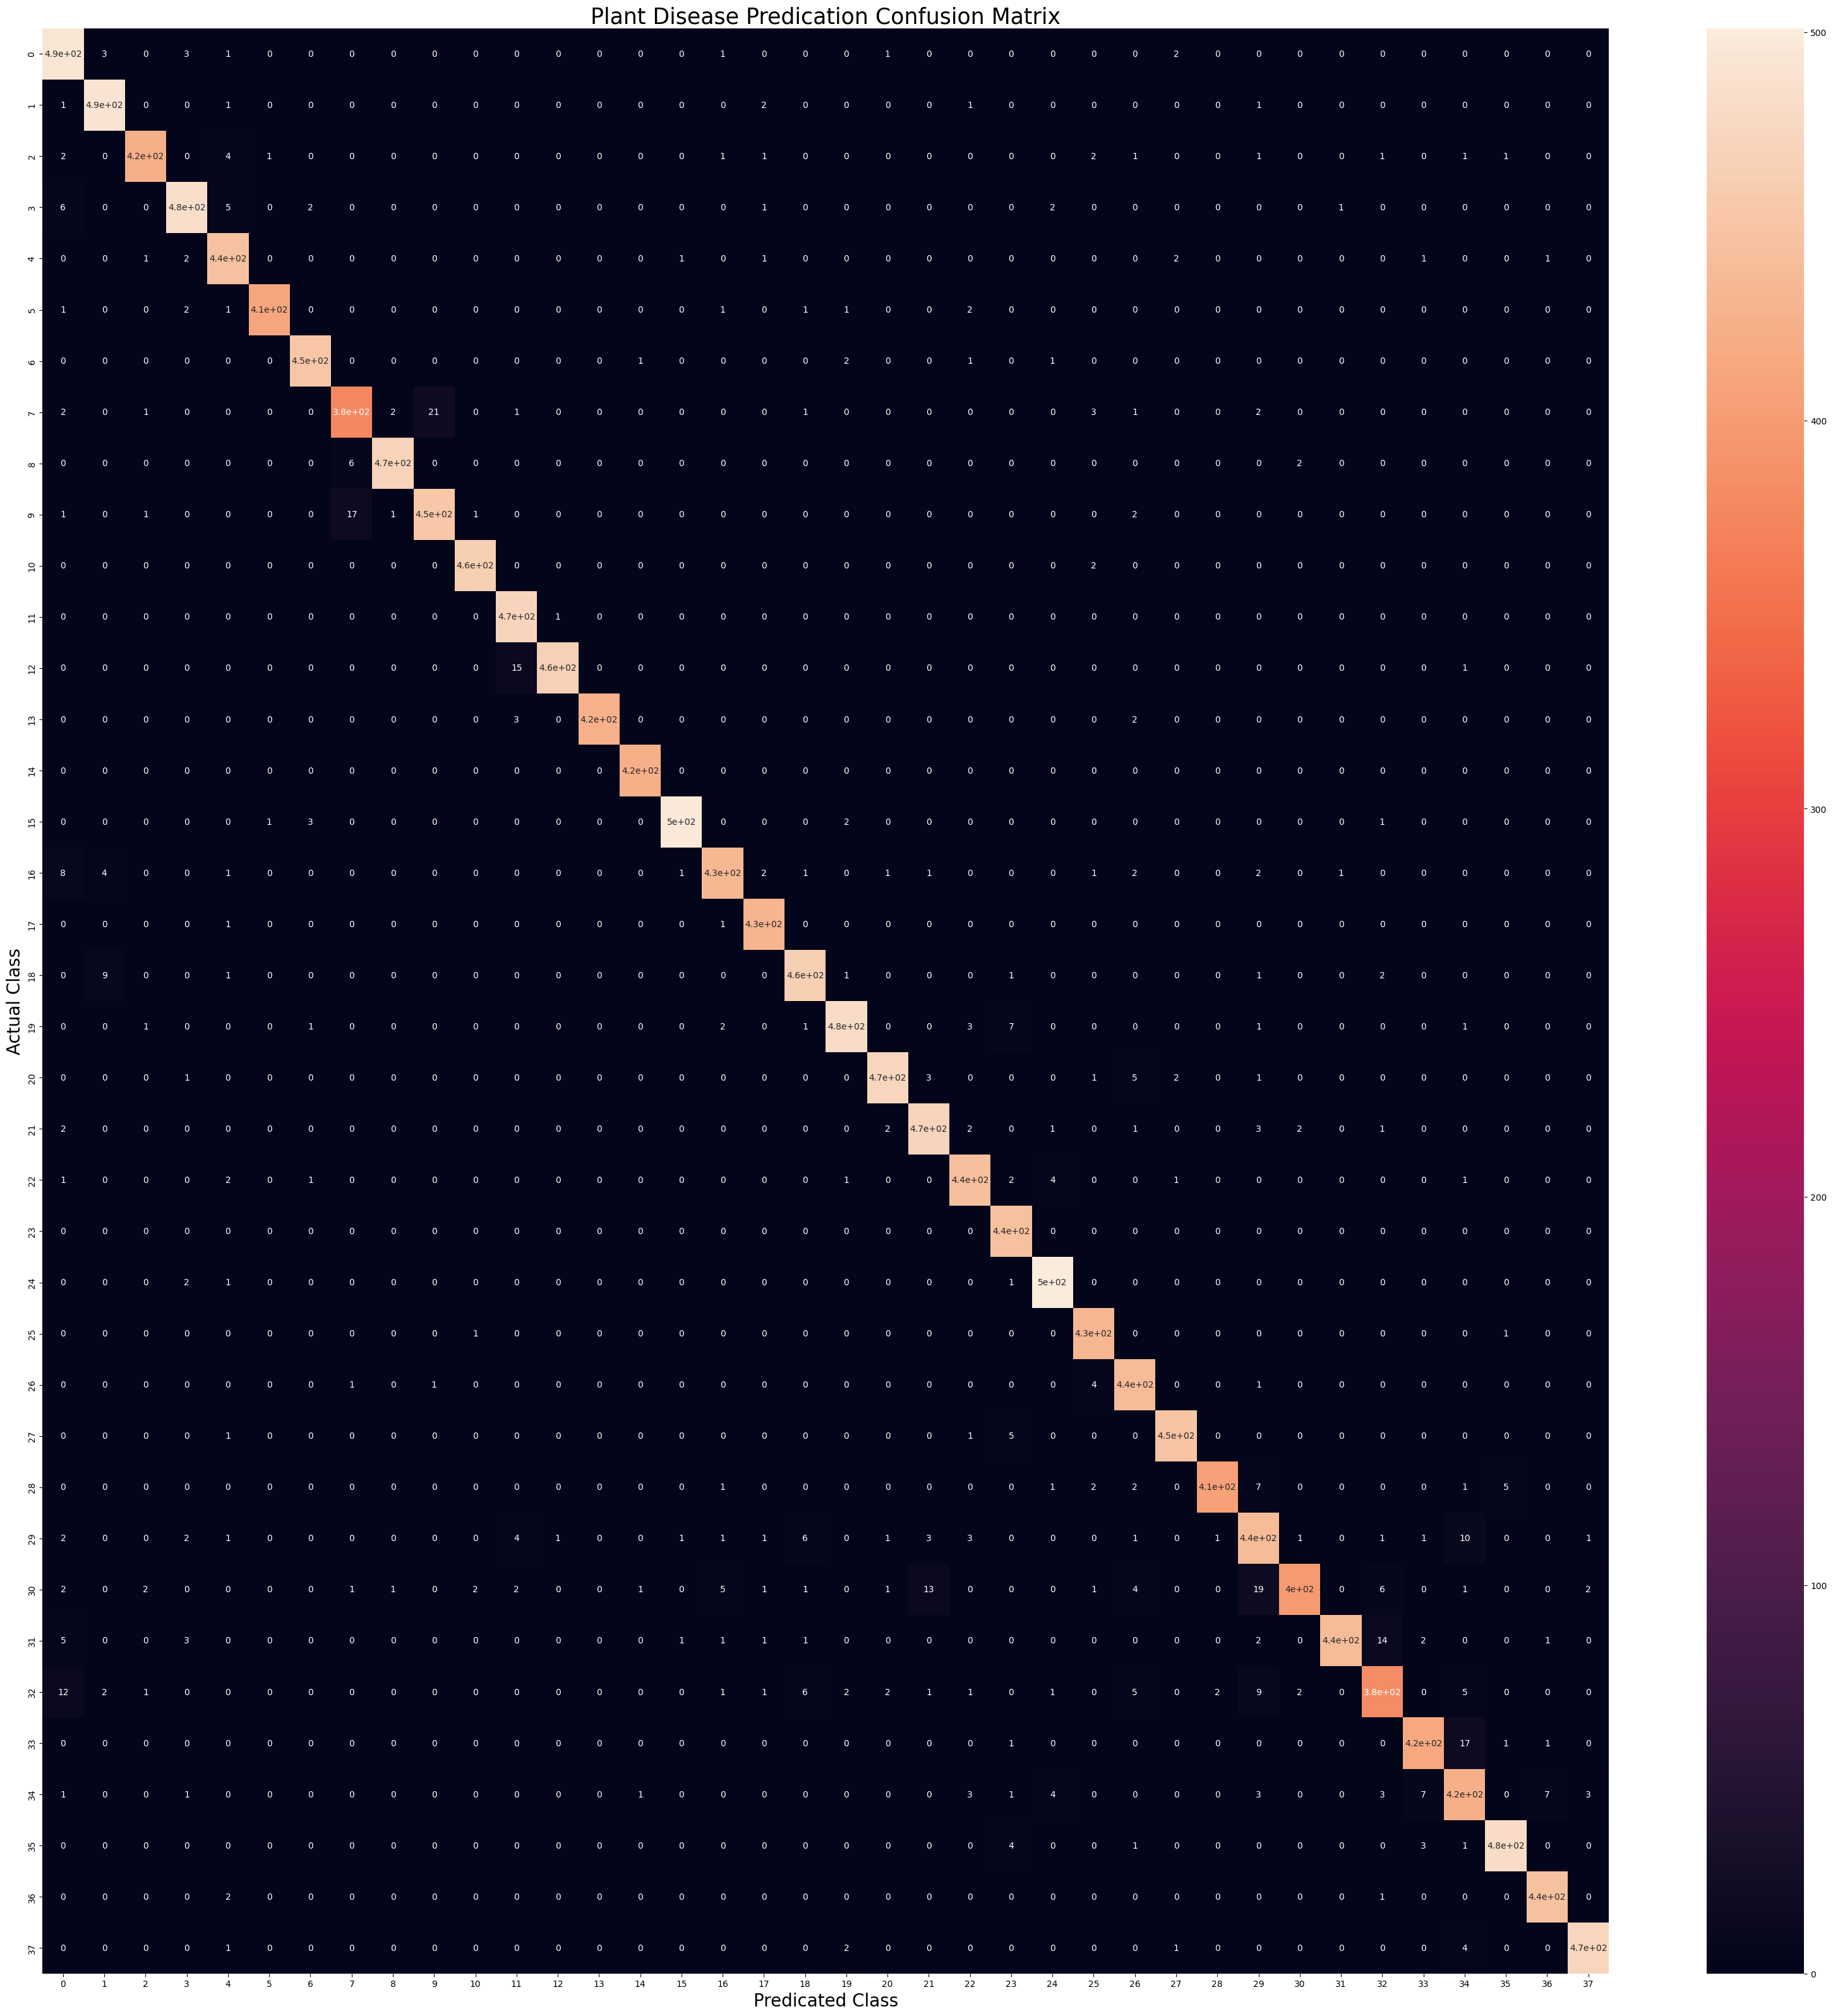

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicated Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Predication Confusion Matrix",fontsize=25)
plt.show()